In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from bokeh.io import output_notebook
output_notebook()
from bokeh.layouts import row, column, widgetbox
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.models.sources import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.models import OpenURL, TapTool, CustomJS, Slider, Range1d, DatetimeTickFormatter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bokeh.charts import Histogram, Bar

import ml_insights as mli

Loading BokehJS ...

In [2]:
def errorbar(fig, x, y, xerr=None, yerr=None, color='red', 
             point_kwargs={}, line_kwargs={}):

    fig.circle(x, y, color=color, **point_kwargs)

    if xerr is not None:
        x_err_x = []
        x_err_y = []
        for px, py, err in zip(x, y, xerr):
            x_err_x.append((px - err, px + err))
            x_err_y.append((py, py))
        fig.multi_line(x_err_x, x_err_y, color=color, **line_kwargs)

    if yerr is not None:
        y_err_x = []
        y_err_y = []
        for px, py, err in zip(x, y, yerr):
            y_err_x.append((px, px))
            y_err_y.append((py - err, py + err))
        fig.multi_line(y_err_x, y_err_y, color=color, **line_kwargs)

In [10]:
df = pd.read_csv('hypers.csv', index_col=0)
df['link'] = df.apply(lambda mo:'http://134.158.75.73:24000/pattern/out_of_class_figs.*{}.*'.format(mo['id']), axis=1)

model_names = [
    'model64', 
    'model101', 
    'model88', 
    'model55', 
    'gan']
output_cols = [
    'out_objectness', 
    'out_count', 
    'out_max',
    'in_objectness', 
    'in_count', 
    'in_max'
]
input_cols = list(set(df.columns) - set(output_cols))

# I you want to study a specific type of model, put its name
# in the variable 'model_name'. it should be a str among the 
# list 'model_names', which is defined above. Otherwise, if
# you want to study all the type of models at the same, set 
#'model_name' to None.
# model_name = 'model64'
# if model_name:
#     df = df[df['model_name'] == model_name]
#     df = df.dropna(axis=0, subset=output_cols)
#     df = df.dropna(axis=1)
df['value'] = df['out_objectness'] + 20 * df['out_count']
#df = df[df['jobset'] == 'jobset87']
df = df[df['model_name'] == 'model64']

In [4]:
#royalblue, coral, seagreen, indianred, goldenrod, black, palevioletred

In [11]:
df['line_color'] = 'royalblue'
df['line_color'][df['model_name'] == 'model55'] = 'coral'
df['line_color'][df['model_name'] == 'model88'] = 'seagreen'
df['line_color'][df['model_name'] == 'model64'] = 'goldenrod'
df['line_color'][df['model_name'] == 'model101'] = 'palevioletred'
df['model_desc'] = 'gan'
df['model_desc'][df['model_name'] == 'model55'] = 'sparse conv'
df['model_desc'][df['model_name'] == 'model88'] = 'brushstroke'
df['model_desc'][df['model_name'] == 'model64'] = 'sparse fully connected'
df['model_desc'][df['model_name'] == 'model101'] = 'multi-scale sparse conv'

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/minico

In [12]:
output_file('./www/models.html')

hover = HoverTool(
        tooltips=[
            ("model", "@model_desc"),
            ("value", "@value"),
            ("denoise", "@denoise"),
            ("nb_layers", "@nb_layers"),
            ("nb_hidden_units_4", "@nb_hidden_units_4"),
            ("nb_hidden_units_3", "@nb_hidden_units_3"),
            ("nb_hidden_units_2", "@nb_hidden_units_2"),
            ("nb_hidden_units_1", "@nb_hidden_units_1"),
            ("nb_hidden_units_0", "@nb_hidden_units_0"),
            ("wta_sparse_perc", "@wta_sparse_perc"),
            ("walkback", "@walkback"),
            ("contractive_coef", "@contractive_coef"),
        ]
    )

tools = [hover, 'pan,wheel_zoom,box_zoom,reset,previewsave,tap']
p = figure(
    plot_width=900, plot_height=900, tools=tools, title='',
)

p.circle(
    'out_objectness', 'out_count', size=10, line_color='line_color', fill_color='line_color',
    fill_alpha=0.9, line_width=1, source=ColumnDataSource(df), legend='model_desc'
)

p.xaxis.axis_label = 'out objectness'
p.yaxis.axis_label = 'out count'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.legend.label_text_font_size = '14pt'
p.title.text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '10pt'

url = "@link"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

In [6]:
df.sort_values(by='out_objectness', ascending=False).head()

,SEED,autoencoding_loss,binarize_thresh,budget_hours,color,color_0,contractive,contractive_coef,dataset,denoise,eps,filter_size,id,jobset,k,k_0,k_1,k_2,k_3,k_4,l2,lr,marginalized,max_nb_epochs,merge_op,mode,model_name,n_steps,nb_fc_layers,nb_fc_units_0,nb_fc_units_1,nb_fc_units_2,nb_fc_units_3,nb_filters_0,nb_filters_1,nb_filters_2,nb_filters_3,nb_filters_4,nb_filters_mul,nb_hidden_units_0,nb_hidden_units_1,nb_hidden_units_2,nb_hidden_units_3,nb_hidden_units_4,nb_hidden_units_5,nb_layers,nb_recurrent_layers,nb_recurrent_units_0,nb_recurrent_units_1,nb_recurrent_units_2,nbatch,ndf,ndfc,ngf,ngfc,niter,niter_decay,noise,nonlin,nonlin_out,normalize_func,nz,parallel,parallel_reduce_func,parallel_share,patch_index,patch_size,recurrent_model,reduce_func,scale,sparse_func,stride,use_wta_channel,use_wta_sparse,use_wta_spatial,walkback,walkback_mode,weight_sharing,wta_channel_stride,wta_sparse_perc,x_max,x_min,x_sigma,x_stride,y_max,y_min,y_sigma,y_stride,in_objectness,out_objectness,in_max,in_count,out_max,out_count,link,value,line_color,model_desc
1280,6.0,squared_error,NaN,2.0,NaN,NaN,False,NaN,digits,0.141414,NaN,NaN,d207dadea5a8a3958bd70774b306729d,jobset87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,900.0,100.0,200.0,800.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,salt_and_pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.050505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.010072,10.256888,0.847884,0.696991,0.345295,0.183860,http://134.158.75.73:24000/pattern/out_of_clas...,13.934080,goldenrod,sparse fully connected
1294,11.0,squared_error,NaN,2.0,NaN,NaN,False,NaN,digits,0.141414,NaN,NaN,4ee2294a8631c612de437f3058c20d70,jobset87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,900.0,100.0,200.0,800.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,salt_and_pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.050505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.042046,10.142353,0.805666,0.623176,0.422888,0.321928,http://134.158.75.73:24000/pattern/out_of_clas...,16.580904,goldenrod,sparse fully connected
1278,5.0,squared_error,NaN,2.0,NaN,NaN,False,NaN,digits,0.141414,NaN,NaN,2f796a80bf2008570a2e8d95e08a9f9e,jobset87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,900.0,100.0,200.0,800.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,salt_and_pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.050505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.495048,10.007165,0.784607,0.641023,0.415434,0.207055,http://134.158.75.73:24000/pattern/out_of_clas...,14.148264,goldenrod,sparse fully connected
1296,14.0,squared_error,NaN,2.0,NaN,NaN,False,NaN,digits,0.141414,NaN,NaN,b7c2bb122984e74932a7c33cdfd29667,jobset87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,900.0,100.0,200.0,800.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,salt_and_pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.050505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.911969,9.973968,0.828497,0.666969,0.378751,0.238219,http://134.158.75.73:24000/pattern/out_of_clas...,14.738338,goldenrod,sparse fully connected
1289,7.0,squared_error,NaN,2.0,NaN,NaN,False,NaN,digits,0.141414,NaN,NaN,eb3117083ab53d7902ac79ff2e93492e,jobset87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,900.0,100.0,200.0,800.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,salt_and_pepper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.050505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.676975,9.944946,0.781500

In [13]:
df_sparse = df[df['model_name'] == 'model64']

In [14]:
df_sparse = df_sparse[df_sparse['value'] > 15]

In [15]:
df_sparse.describe()

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,SEED,binarize_thresh,budget_hours,color_0,contractive_coef,denoise,eps,filter_size,k,k_0,k_1,k_2,k_3,k_4,l2,lr,max_nb_epochs,n_steps,nb_fc_layers,nb_fc_units_0,nb_fc_units_1,nb_fc_units_2,nb_fc_units_3,nb_filters_0,nb_filters_1,nb_filters_2,nb_filters_3,nb_filters_4,nb_filters_mul,nb_hidden_units_0,nb_hidden_units_1,nb_hidden_units_2,nb_hidden_units_3,nb_hidden_units_4,nb_hidden_units_5,nb_layers,nb_recurrent_layers,nb_recurrent_units_0,nb_recurrent_units_1,nb_recurrent_units_2,nbatch,ndf,ndfc,ngf,ngfc,niter,niter_decay,nz,parallel,patch_index,patch_size,scale,stride,walkback,wta_channel_stride,wta_sparse_perc,x_min,x_stride,y_min,y_stride,in_objectness,out_objectness,in_max,in_count,out_max,out_count,value
count,1.0,37.0,115.0,0.0,7.000000,52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,108.000000,105.000000,103.000000,102.000000,0.0,115.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,0.0,115.000000,0.0,0.0,0.0,0.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,11.0,0.5,2.0,NaN,61.347348,0.138695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612.173913,589.814815,551.428571,590.291262,737.254902,NaN,4.634783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121739,NaN,0.576109,NaN,NaN,NaN,NaN,5.354828,9.066433,0.574837,0.427618,0.572085,0.364104,16.348515
std,NaN,0.0,0.0,NaN,37.295023,0.099526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.249107,280.500159,287.600914,289.189050,214.301337,NaN,1.078745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498204,NaN,0.292688,NaN,NaN,NaN,NaN,0.903104,0.782954,0.104122,0.128548,0.062185,0.032387,1.013324
min,11.0,0.5,2.0,NaN,2.341137,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,200.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.040404,NaN,NaN,NaN,NaN,3.158419,7.334132,0.440494,0.071651,0.407309,0.286367,15.006626
25%,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.353535,NaN,NaN,NaN,NaN,4.825135,8.463748,0.505504,0.348023,0.533569,0.342909,15.534949
50%,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.636364,NaN,NaN,NaN,NaN,5.155576,8.972765,0.528222,0.395889,0.591176,0.363161,16.179645
75%,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.833333,NaN,NaN,NaN,NaN,5.819955,9.574741,0.654030,0.502673,0.618907,0.386442,16.872054
max,11.0,0.5,2.0,NaN,87.625418,0.388889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.000000,NaN,NaN,NaN,NaN,7.922404,11.122325,0.825487,0.711515,0.662106,0.436799,19.193021


In [16]:
variable = 'denoise'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [-0.1, 0.0001, 0.1, 0.2, 0.3, 0.4, 0.5]

In [74]:
variable = 'nb_layers'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [-0.1, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [136]:
variable = 'nb_hidden_units_0'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [-50, 50, 150, 250, 350, 450, 550, 650 , 750, 850, 950, 1050]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [90]:
variable = 'wta_sparse_perc'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [96]:
variable = 'contractive_coef'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [-.01, 0.01, 20, 40, 60, 80, 100]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [93]:
variable = 'walkback'
df_sparse[variable] = df_sparse[variable].fillna(0)
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
df_sparse[variable + '_binned'] = pd.cut(df_sparse[variable], bins)
groups = df_sparse.groupby(variable + '_binned')
binned_df = pd.DataFrame()
binned_df['x_mean'] = groups[variable].mean()
binned_df['y_mean'] = groups['value'].mean()
binned_df['x_err'] = groups[variable].std() / np.sqrt(groups[variable].count())
binned_df['y_err'] = groups['value'].std() / np.sqrt(groups['value'].count())

In [20]:
output_file('./www/' + variable + '_scatter.html')

hover = HoverTool(
        tooltips=[
            ("model", "@model_desc"),
            ("value", "@value"),
            ("denoise", "@denoise"),
            ("nb_layers", "@nb_layers"),
            ("nb_hidden_units_4", "@nb_hidden_units_4"),
            ("nb_hidden_units_3", "@nb_hidden_units_3"),
            ("nb_hidden_units_2", "@nb_hidden_units_2"),
            ("nb_hidden_units_1", "@nb_hidden_units_1"),
            ("nb_hidden_units_0", "@nb_hidden_units_0"),
            ("wta_sparse_perc", "@wta_sparse_perc"),
            ("walkback", "@walkback"),
            ("contractive_coef", "@contractive_coef"),
            ("noise", "@noise")
        ]
    )

tools = [hover, 'pan,wheel_zoom,box_zoom,reset,previewsave,tap']
p = figure(
    plot_width=900, plot_height=600, tools=tools, title='',
)

p.circle(
    variable, 'value', size=10, line_color='line_color', fill_color='line_color',
    fill_alpha=0.9, line_width=1, source=ColumnDataSource(df_sparse), legend='model_desc'
)

errorbar(p, x=binned_df['x_mean'], y=binned_df['y_mean'], xerr=binned_df['x_err'], yerr=binned_df['y_err'],
         color='black', point_kwargs={'size':5}, line_kwargs={'line_width':5})

p.xaxis.axis_label = variable
p.yaxis.axis_label = 'out objectness + 20 x out count'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.legend.label_text_font_size = '14pt'
p.title.text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '10pt'

url = "@link"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

In [141]:
df_conv = df[df['model_name'] == 'model101']

In [ ]:
output_file('./www/conv_models.html')

hover = HoverTool(
        tooltips=[
            ("model", "@model_desc"),
            ("value", "@value"),
            ("denoise", "@denoise"),
            ("filter_size", "@filter_size"),
            ("nb_layers", "@nb_layers"),
            ("nb_filters_0", "@nb_filters_0"),
            ("nb_filters_1", "@nb_filters_1"),
            ("nb_filters_2", "@nb_filters_2"),
            ("nb_filters_3", "@nb_filters_3"),
            ("nb_filters_4", "@nb_filters_4"),
            ("k_0", "@k_0"),
            ("k_1", "@k_1"),
            ("k_2", "@k_2"),
            ("k_3", "@k_3"),
            ("k_4", "@k_4"),
            ("stride", "@stride"),
            ("walkback", "@walkback"),
            ("nb_filters_mul", "@nb_filters_mul"),
        ]
    )

tools = [hover, 'pan,wheel_zoom,box_zoom,reset,previewsave,tap']
p = figure(
    plot_width=900, plot_height=900, tools=tools, title='',
)

p.circle(
    'out_objectness', 'out_count', size=10, line_color='line_color', fill_color='line_color',
    fill_alpha=0.9, line_width=1, source=ColumnDataSource(df_conv), legend='model_desc'
)

p.xaxis.axis_label = 'out objectness'
p.yaxis.axis_label = 'out count'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.legend.label_text_font_size = '14pt'
p.title.text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '10pt'

url = "@link"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

In [143]:
df_conv.describe()

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,binarize_thresh,budget_hours,color_0,contractive_coef,denoise,eps,filter_size,k,k_0,k_1,k_2,k_3,k_4,l2,lr,max_nb_epochs,n_steps,nb_fc_layers,nb_fc_units_0,nb_fc_units_1,nb_fc_units_2,nb_fc_units_3,nb_filters_0,nb_filters_1,nb_filters_2,nb_filters_3,nb_filters_4,nb_filters_mul,nb_hidden_units_0,nb_hidden_units_1,nb_hidden_units_2,nb_hidden_units_3,nb_hidden_units_4,nb_layers,nb_recurrent_layers,nb_recurrent_units_0,nb_recurrent_units_1,nb_recurrent_units_2,nbatch,ndf,ndfc,ngf,ngfc,niter,niter_decay,nz,parallel,patch_index,patch_size,scale,stride,walkback,wta_channel_stride,wta_sparse_perc,x_min,x_stride,y_min,y_stride,in_objectness,out_objectness,in_max,in_count,out_max,out_count,value
count,0.0,166.0,0.0,0.0,0.0,0.0,166.000000,0.0,166.000000,137.00000,95.000000,52.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000,137.000000,95.000000,52.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,166.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.000000,166.0,0.0,0.0,0.0,0.0,0.0,0.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,NaN,6.0,NaN,NaN,NaN,NaN,4.180723,NaN,2.759036,2.49635,2.547368,2.538462,2.615385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.096386,131.503650,142.821053,128.153846,146.461538,NaN,NaN,NaN,NaN,NaN,NaN,2.789157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051282,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.119683,4.613594,0.321304,0.069710,0.502920,0.198557,8.584725
std,NaN,0.0,NaN,NaN,NaN,NaN,0.986510,NaN,1.112904,1.11885,1.164807,1.195769,1.043908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.417945,154.486965,161.351604,157.609518,175.860084,NaN,NaN,NaN,NaN,NaN,NaN,1.210110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.168641,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.330371,1.924095,0.137979,0.124714,0.139974,0.128039,4.237030
min,NaN,6.0,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000,8.000000,8.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000005,0.999994,0.005133,0.000000,0.139053,0.000000,0.999994
25%,NaN,6.0,NaN,NaN,NaN,NaN,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,6.0,NaN,NaN,NaN,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.0,NaN,NaN,NaN,NaN,5.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,6.0,NaN,NaN,NaN,NaN,5.000000,NaN,4.000000,4.00000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512.000000,512.000000,512.000000,512.000000,512.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.126493,10.271873,0.626670,0.501530,0.646949,0.435367,18.741189


In [102]:
variable = 'denoise'
df_conv[variable] = df_conv[variable].fillna(0)
bins = [-0.1, 0.0001, 0.1, 0.2, 0.3, 0.4, 0.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [108]:
variable = 'nb_layers'
df_conv[variable] = df_conv[variable].fillna(0)
bins = [-0.1, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [115]:
variable = 'filter_size'
df_conv[variable] = df_conv[variable].fillna(0)
bins = [-0.1, 0.5, 5.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [120]:
variable = 'wta_channel_stride'
df_conv[variable] = df_conv[variable].fillna(0)
bins = [0.5, 1.5, 2.5, 3.5, 4.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
variable = 'nb_filters_0'
df_conv[variable] = df_conv[variable].fillna(0)
bins = [0.5, 1.5, 2.5, 3.5, 4.5]

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [124]:
df_conv[variable + '_binned'] = pd.cut(df_conv[variable], bins)
groups = df_conv.groupby(variable + '_binned')
binned_df = pd.DataFrame()
binned_df['x_mean'] = groups[variable].mean()
binned_df['y_mean'] = groups['value'].mean()
binned_df['x_err'] = groups[variable].std() / np.sqrt(groups[variable].count())
binned_df['y_err'] = groups['value'].std() / np.sqrt(groups['value'].count())

/home/ubuntu/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
output_file('./www/' + variable + '_conv_scatter.html')

hover = HoverTool(
        tooltips=[
            ("model", "@model_desc"),
            ("value", "@value"),
            ("denoise", "@denoise"),
            ("filter_size", "@filter_size"),
            ("nb_layers", "@nb_layers"),
            ("nb_filters_0", "@nb_filters_0"),
            ("nb_filters_1", "@nb_filters_1"),
            ("nb_filters_2", "@nb_filters_2"),
            ("nb_filters_3", "@nb_filters_3"),
            ("nb_filters_4", "@nb_filters_4"),
            ("wta_channel_stride", "@wta_channel_stride"),
            ("walkback", "@walkback"),
            ("nb_filters_mul", "@nb_filters_mul"),
        ]
    )

tools = [hover, 'pan,wheel_zoom,box_zoom,reset,previewsave,tap']
p = figure(
    plot_width=900, plot_height=600, tools=tools, title='',
)

p.circle(
    variable, 'value', size=10, line_color='line_color', fill_color='line_color',
    fill_alpha=0.9, line_width=1, source=ColumnDataSource(df_conv), legend='model_desc'
)

errorbar(p, x=binned_df['x_mean'], y=binned_df['y_mean'], xerr=binned_df['x_err'], yerr=binned_df['y_err'],
         color='black', point_kwargs={'size':5}, line_kwargs={'line_width':5})

p.xaxis.axis_label = variable
p.yaxis.axis_label = 'out objectness + 20 x out count'
p.xaxis.axis_label_text_font_size = '14pt'
p.yaxis.axis_label_text_font_size = '14pt'
p.legend.label_text_font_size = '14pt'
p.title.text_font_size = '16pt'
p.xaxis.major_label_text_font_size = '10pt'

url = "@link"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

## Feature importances

In [31]:
data = df.dropna(subset=output_cols, axis=0)
# shuffling data
ind = np.arange(len(data))
np.random.shuffle(ind)
data = data.iloc[ind]
data.head()

,autoencoding_loss,binarize_thresh,budget_hours,color,color_0,contractive,contractive_coef,dataset,denoise,eps,filter_size,id,k,k_0,k_1,k_2,k_3,k_4,l2,lr,marginalized,max_nb_epochs,merge_op,mode,model_name,n_steps,nb_fc_layers,nb_fc_units_0,nb_fc_units_1,nb_fc_units_2,nb_fc_units_3,nb_filters_0,nb_filters_1,nb_filters_2,nb_filters_3,nb_filters_4,nb_filters_mul,nb_hidden_units_0,nb_hidden_units_1,nb_hidden_units_2,nb_hidden_units_3,nb_hidden_units_4,nb_layers,nb_recurrent_layers,nb_recurrent_units_0,nb_recurrent_units_1,nb_recurrent_units_2,nbatch,ndf,ndfc,ngf,ngfc,niter,niter_decay,noise,nonlin,nonlin_out,normalize_func,nz,parallel,parallel_reduce_func,parallel_share,patch_index,patch_size,recurrent_model,reduce_func,scale,sparse_func,stride,use_wta_channel,use_wta_sparse,use_wta_spatial,walkback,walkback_mode,weight_sharing,wta_channel_stride,wta_sparse_perc,x_max,x_min,x_sigma,x_stride,y_max,y_min,y_sigma,y_stride,in_objectness,out_objectness,in_max,in_count,out_max,out_count,link,line_color,model_desc
993,squared_error,NaN,6.0,NaN,NaN,False,NaN,digits,0.419192,NaN,3.0,09bd0e781aaec2e16ee8d8ca138610ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model55,NaN,NaN,NaN,NaN,NaN,NaN,512.0,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero_masking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,5.0,bengio_without_sampling,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.631419,4.504400,0.452460,0.045399,0.614223,0.251611,http://134.158.75.73:24000/pattern/out_of_clas...,coral,sparse conv
288,squared_error,NaN,6.0,NaN,1.0,False,NaN,digits,NaN,0.0,NaN,06df3e1082a7ec65e94672d99912ed5f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1.000000e+10,NaN,random,model88,72.0,3.0,1300.0,200.0,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,500.0,400.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rectify,sigmoid,sigmoid,NaN,1.0,sum,False,0.0,5.0,gru,sum,NaN,NaN,NaN,NaN,NaN,NaN,1.0,bengio_without_sampling,NaN,NaN,NaN,width,0.0,1,1.0,height,0.0,1,1.0,2.240066,1.943735,0.331128,0.000000,0.323034,0.061821,http://134.158.75.73:24000/pattern/out_of_clas...,seagreen,brushstroke
5,squared_error,NaN,2.0,NaN,NaN,True,88.963211,digits,0.116162,NaN,NaN,8ca79c3bf8c826489c94c91e712dc866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero_masking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1.0,bengio_without_sampling,NaN,NaN,0.030303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.566108,4.535047,0.274209,0.000000,0.506817,0.099893,http://134.158.75.73:24000/pattern/out_of_clas...,goldenrod,sparse fully connected
748,squared_error,NaN,6.0,NaN,NaN,False,NaN,digits,NaN,NaN,5.0,a0eb92eff0dc46636069692ae98adb66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,model55,NaN,NaN,NaN,NaN,NaN,NaN,8.0,512.0,8.0,512.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,1.0,bengio_without_sampling,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.654645,6.299788,0.486309,0.379439,0.574221,0.334189,http://134.158.75.73:24000/pattern/out_of_clas...,coral,sparse conv
853,squared_error,NaN,6.0,NaN,1.0,False,NaN,digits,NaN,0.0,NaN,29a60e4977fafb7a4d3cb139667f67a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1.000000e+10,NaN,random,model88,64.0,4.0,200.0,1900.0,2000.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,200.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,very_leaky_rectify,sigmoid,sigmoid,NaN,1.0,sum,False,0.0,2.0,rnn,over,NaN,NaN,NaN,NaN,NaN,NaN,1.0,bengio_without_sampling,NaN,NaN,NaN,width,0.0,1,1.0,height,0.0,1,1.0,5.732255,8.025421,0.584984,0.465840,0.571414,0.374608,http://134.158.75.73:24000/pattern/out_of_clas...,seagreen,brushstroke


In [32]:
x = data.drop(output_cols, axis=1)
x = pd.get_dummies(x)
x = x.fillna(-1)
y = data['out_objectness'] + 20 * data['out_count']

param_dist = {"max_depth": sp_randint(10, 100),
              "max_features": sp_randint(1, 10),
              "n_estimators": sp_randint(10, 100)}
n_iter_search = 30
reg = RandomizedSearchCV(
    RandomForestRegressor(), 
    n_jobs=-1,
    param_distributions=param_dist, 
    n_iter=n_iter_search, 
    scoring=make_scorer(r2_score),
    refit=True,
    cv=KFold(5).get_n_splits())
reg.fit(x, y)
print(reg.best_params_)
print(reg.best_score_)
best_reg = reg.best_estimator_

{'n_estimators': 80, 'max_features': 7, 'max_depth': 95}
0.350760497357


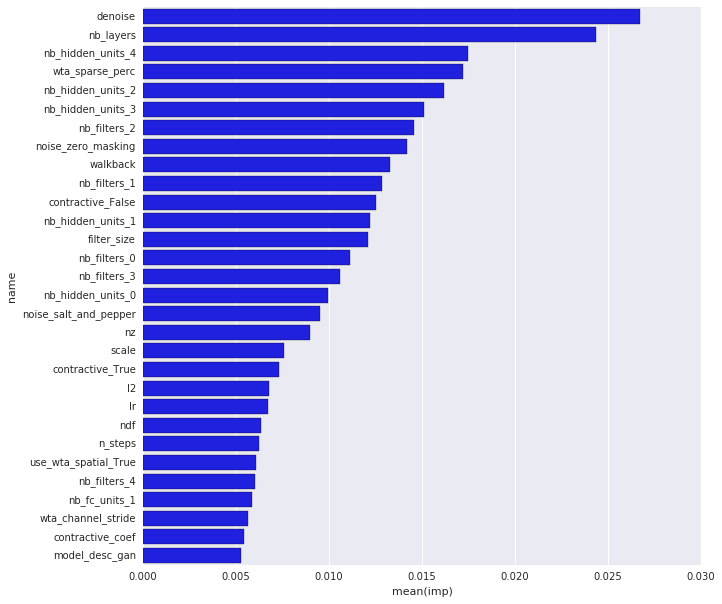

In [33]:
df = pd.DataFrame({'name': x.columns, 'imp': best_reg.feature_importances_})
df = df.sort_values(by='imp', ascending=False)
df = df.iloc[0:30]
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='imp', y='name', data=df, color='blue', orient='h')
plt.show()

In [ ]:
## ML insights is a package to understand supervised models
# check <https://github.com/numeristical/introspective> for more info
# e.g https://github.com/numeristical/introspective/blob/master/examples/Ames_Housing_Analysis.ipynb

In [ ]:
mxr = mli.ModelXRay(best_reg, x)

In [ ]:
mxr.feature_effect_summary?

In [ ]:
mxr.feature_effect_summary()

In [ ]:
mxr.feature_dependence_plots?

In [ ]:
mxr.feature_dependence_plots(num_pts=5)